In [1]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import libpysal as lp
import rasterio as rio
import numpy as np
import contextily as ctx
import shapely.geometry as geom
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:

url = url = 'https://raw.github.com/ssujit/move_sustainable/main/data/'

# variable declaration
wkam = 'wk_am_hamburg.gpkg' # wk_am: weekdays peak-traffic morning hours (6:00-8:59) 

#read the files
wk_am = gpd.read_file(f'{url}{wkam}')

In [3]:
wk_am.head()

,VALUE,grid_name,net_dis,perH_sum,fi,geometry
0,514.24882,6,514,1.665,0.003,"POLYGON ((574591.689 5952249.123, 575602.193 5..."
1,954.49117,9,954,5.665,0.006,"POLYGON ((570549.674 5951247.039, 571560.177 5..."
2,167.29258,11,167,46.000,0.275,"POLYGON ((572570.681 5951247.039, 573581.185 5..."
3,517.34294,12,517,11.670,0.023,"POLYGON ((573581.185 5951247.039, 574591.689 5..."
4,745.92077,13,746,0.665,0.001,"POLYGON ((574591.689 5951247.039, 575602.193 5..."


In [4]:
wk_am.explore()

In [5]:
fi_values = [wk_am['fi']]

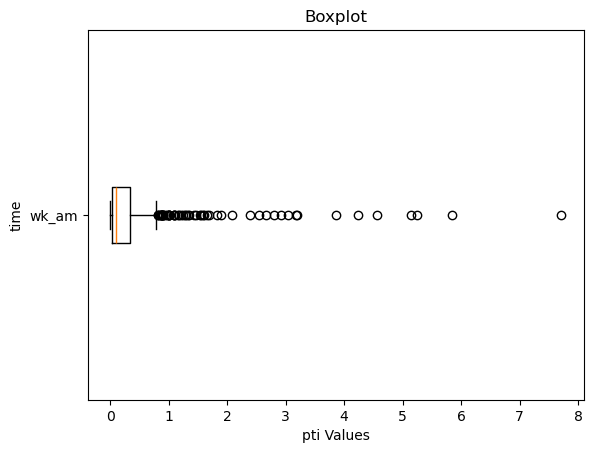

In [6]:
plt.boxplot(fi_values, labels=['wk_am'], vert=False)

# Add labels and title
plt.xlabel('pti Values')
plt.ylabel('time')
plt.title('Boxplot')

# Show the plot
plt.show()

<Axes: xlabel='fi', ylabel='Density'>

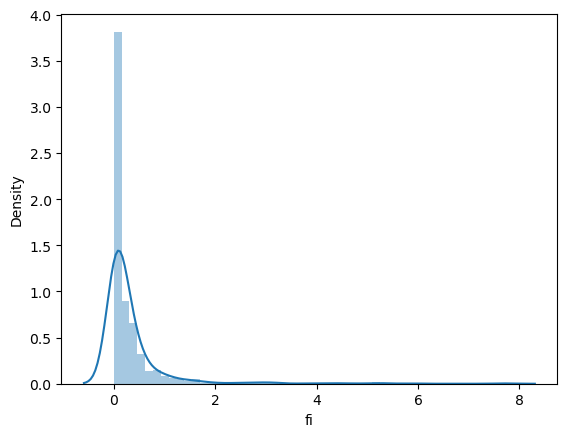

In [7]:
sns.distplot(wk_am['fi'])

<Axes: >

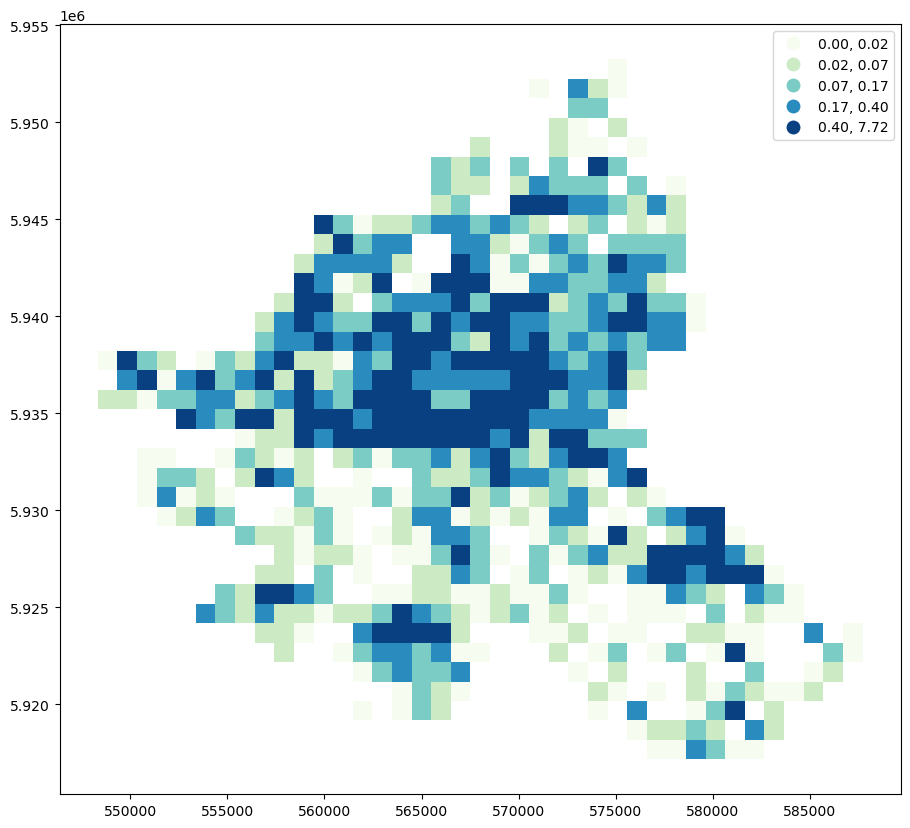

In [8]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw=dict(aspect='equal'))
wk_am.plot(column='fi', scheme='Quantiles', 
        k=5, cmap='GnBu', legend=True, ax=ax)

In [9]:
wq =  lp.weights.Queen.from_dataframe(wk_am)
wq.transform = 'r'

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 178, ' is an island (no neighbors)')
('WARNING: ', 232, ' is an island (no neighbors)')
('WARNING: ', 302, ' is an island (no neighbors)')
('WARNING: ', 305, ' is an island (no neighbors)')
('WARNING: ', 355, ' is an island (no neighbors)')
('WARNING: ', 392, ' is an island (no neighbors)')
('WARNING: ', 393, ' is an island (no neighbors)')
('WARNING: ', 398, ' is an island (no neighbors)')
('WARNING: ', 424, ' is an island (no neighbors)')
('WARNING: ', 483, ' is an island (no neighbors)')
('WARNING: ', 490, ' is an island (no neighbors)')
('WARNING: ', 502, ' is an island (no neighbors)')
('WARNING: ', 521, ' is an island (no neighbors)')
('WARNING: ', 524, ' is an island (no n

In [10]:
y = wk_am['fi']
ylag = lp.weights.lag_spatial(wq, y)

In [11]:
ylag

array([1.0000e-03, 0.0000e+00, 1.0600e-01, 1.4600e-01, 3.0000e-03,
       1.3950e-01, 2.3000e-02, 6.7000e-02, 5.4500e-02, 0.0000e+00,
       1.0000e-01, 6.9500e-02, 4.0000e-03, 4.2800e-01, 0.0000e+00,
       7.6000e-02, 5.3000e-02, 4.3000e-02, 5.0000e-02, 7.7500e-02,
       5.4000e-02, 0.0000e+00, 1.0350e-01, 6.9000e-02, 1.0000e-01,
       2.9550e-01, 4.1600e-01, 5.3450e-01, 1.7300e-01, 3.1350e-01,
       3.2000e-02, 2.7000e-02, 1.3250e-01, 2.0550e-01, 9.6000e-02,
       1.1050e-01, 8.8000e-02, 8.4000e-02, 8.9000e-02, 0.0000e+00,
       4.7500e-02, 1.2000e-02, 1.5000e-02, 6.5000e-02, 5.0500e-01,
       1.2400e-01, 1.9500e-01, 1.8800e-01, 0.0000e+00, 5.4000e-02,
       1.4200e-01, 2.6200e-01, 5.7000e-02, 2.6250e-01, 2.8200e-01,
       1.3300e-01, 1.9900e-01, 5.1000e-02, 1.6150e-01, 6.2500e-02,
       4.0850e-01, 2.2800e-01, 1.6250e-01, 1.0850e-01, 2.9500e-02,
       5.2250e-01, 1.8750e-01, 1.0350e-01, 1.5450e-01, 2.0500e-02,
       1.0800e-01, 1.0650e-01, 5.0900e-01, 1.8900e-01, 1.2800e

In [12]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

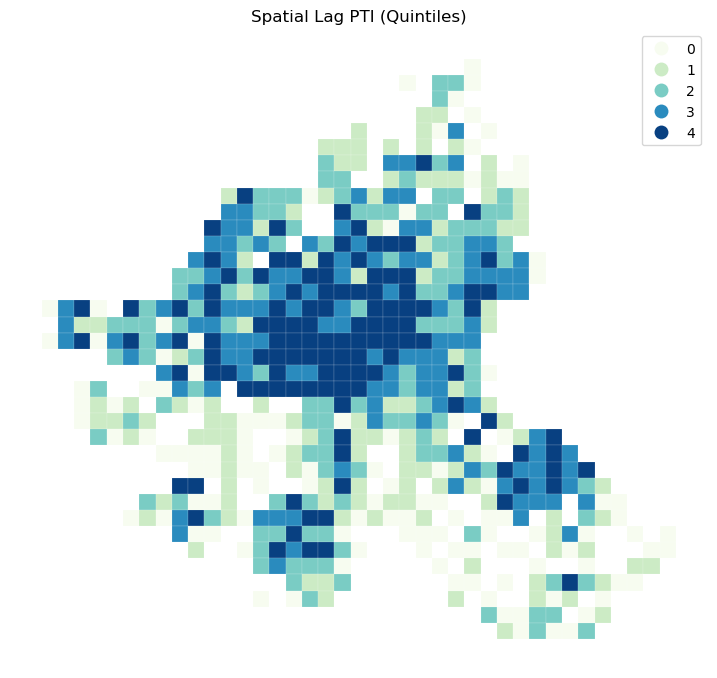

In [13]:
f,ax = plt.subplots(1, figsize=(9, 9), subplot_kw=dict(aspect='equal'))
wk_am.assign(cl=ylagq5.yb).plot(column='cl', categorical=True,
        k=5, cmap='GnBu', linewidth=0.1,
        edgecolor='white', legend=True, ax=ax)
ax.set_axis_off()
plt.title("Spatial Lag PTI (Quintiles)")

plt.show()

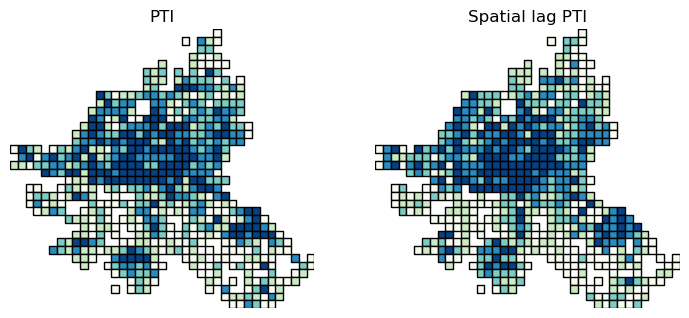

In [14]:
wk_am['lag_PTI'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4), subplot_kw=dict(aspect='equal'))
wk_am.plot(column='fi', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(wk_am.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("PTI")
wk_am.plot(column='lag_PTI', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(wk_am.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial lag PTI")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [15]:
y.median()

0.102

In [16]:
yb = y > y.median()
sum(yb)

298

In [17]:
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb] 
wk_am['yb'] = yb

<Axes: >

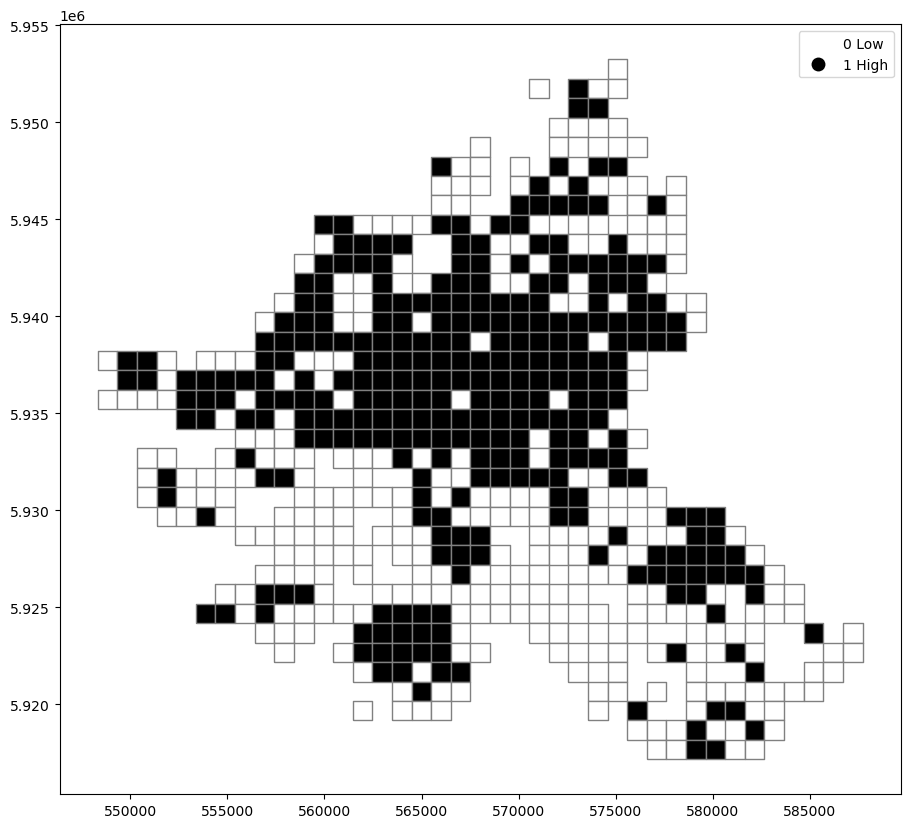

In [18]:
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
wk_am.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

In [19]:
import esda 
yb = 1 * (y > y.median()) # convert back to binary
wq =  lp.weights.Queen.from_dataframe(wk_am)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

In [20]:
jc.bb

187.0

In [21]:
jc.ww

124.0

In [22]:
jc.bw

169.0

In [23]:
jc.bb + jc.ww + jc.bw

480.0

In [24]:
wq.s0 / 2

480.0

In [25]:
jc.bb

187.0

In [26]:
jc.mean_bb

119.1911911911912

Text(0.5, 0, 'BB Counts')

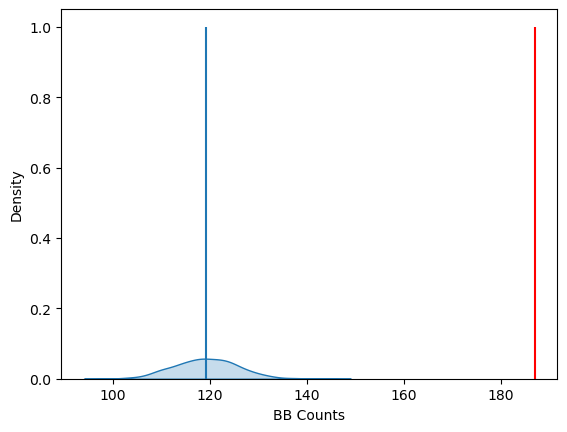

In [27]:
import seaborn as sbn
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 1, color='r')
plt.vlines(jc.mean_bb, 0,1)
plt.xlabel('BB Counts')

In [28]:
jc.p_sim_bb

0.001

In [29]:
wq.transform = 'r'

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 178, ' is an island (no neighbors)')
('WARNING: ', 232, ' is an island (no neighbors)')
('WARNING: ', 302, ' is an island (no neighbors)')
('WARNING: ', 305, ' is an island (no neighbors)')
('WARNING: ', 355, ' is an island (no neighbors)')
('WARNING: ', 392, ' is an island (no neighbors)')
('WARNING: ', 393, ' is an island (no neighbors)')
('WARNING: ', 398, ' is an island (no neighbors)')
('WARNING: ', 424, ' is an island (no neighbors)')
('WARNING: ', 483, ' is an island (no neighbors)')
('WARNING: ', 490, ' is an island (no neighbors)')
('WARNING: ', 502, ' is an island (no neighbors)')
('WARNING: ', 521, ' is an island (no neighbors)')
('WARNING: ', 524, ' is an island (no n

In [30]:
y = wk_am['fi']

In [31]:
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.17369881678819912

Text(0.5, 0, "Moran's I")

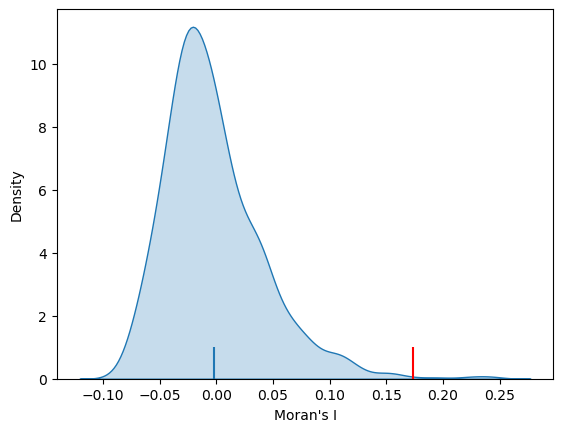

In [32]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [33]:
mi.p_sim

0.005

In [34]:
np.random.seed(12345)

In [35]:
wq.transform = 'r'
lag_pti = lp.weights.lag_spatial(wq, wk_am['fi'])

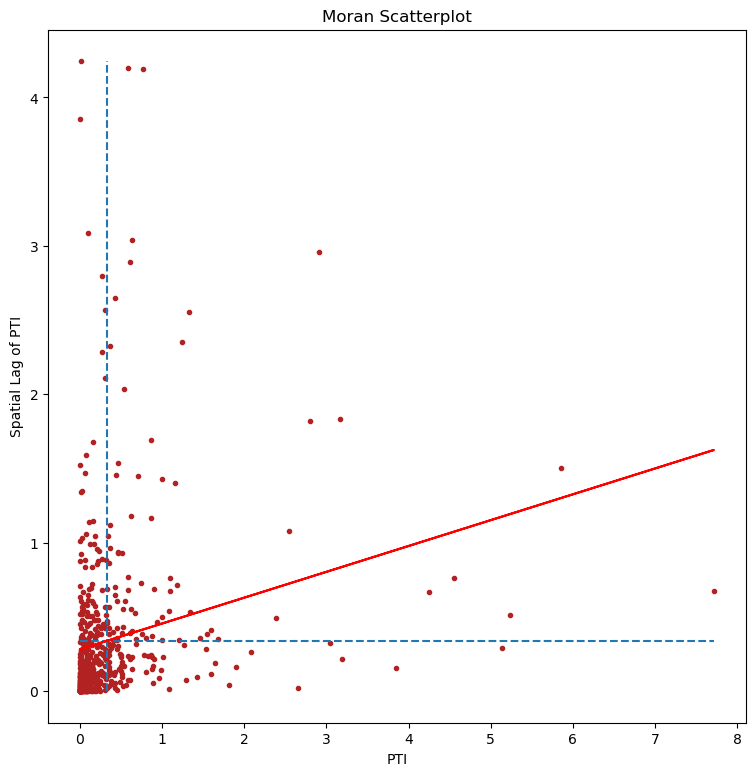

In [36]:
pti = wk_am['fi']
b, a = np.polyfit(pti, lag_pti, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(pti, lag_pti, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(pti.mean(), lag_pti.min(), lag_pti.max(), linestyle='--')
 # dashed horizontal at mean of lagged price 
plt.hlines(lag_pti.mean(), pti.min(), pti.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(pti, a + b*pti, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of PTI')
plt.xlabel('PTI')
plt.show()

In [37]:
li = esda.moran.Moran_Local(y, wq)

In [38]:
li.q

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4,
       2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 2,
       3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 2, 4, 3, 3, 2, 3, 4, 2, 3, 3, 3, 2,
       3, 3, 4, 4, 3, 3, 1, 1, 3, 3, 4, 3, 4, 1, 4, 2, 2, 2, 4, 3, 3, 3,
       1, 3, 3, 1, 4, 3, 2, 2, 3, 2, 1, 2, 4, 4, 4, 3, 3, 3, 2, 1, 3, 2,
       3, 3, 3, 1, 2, 3, 2, 4, 1, 2, 1, 1, 4, 1, 2, 2, 3, 3, 3, 4, 1, 3,
       4, 3, 3, 2, 2, 4, 4, 4, 4, 1, 1, 1, 2, 2, 1, 2, 1, 3, 3, 3, 1, 2,
       4, 1, 3, 1, 2, 3, 2, 3, 2, 2, 4, 2, 3, 3, 2, 2, 1, 1, 1, 4, 4, 1,
       1, 1, 2, 3, 3, 1, 3, 1, 4, 3, 4, 4, 3, 4, 4, 2, 4, 3, 3, 1, 1, 1,
       1, 3, 1, 2, 2, 1, 1, 4, 4, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       1, 2, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 2, 4, 4, 3, 4, 4,
       3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 3, 3, 3, 2, 3, 1,
       2, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 2,

In [39]:
(li.p_sim < 0.05).sum()

82

In [40]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

In [41]:
spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

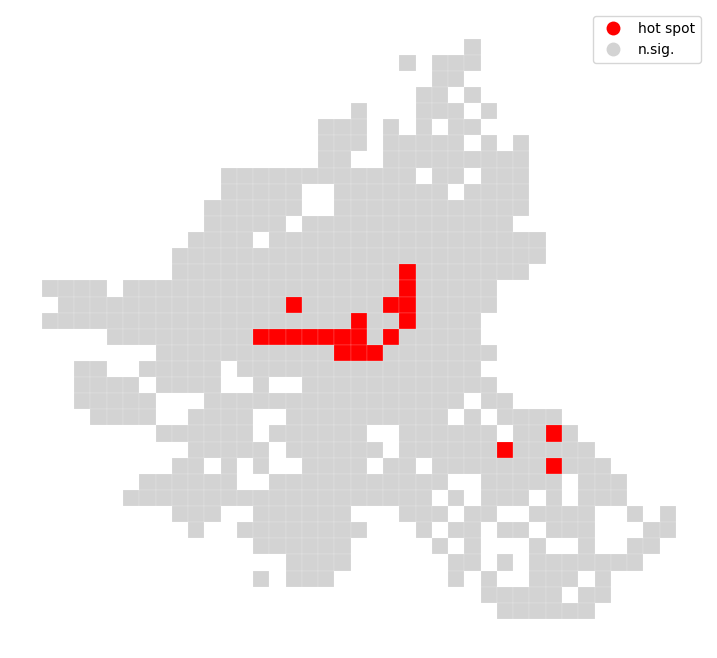

In [42]:
wk_am = wk_am
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
wk_am.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [43]:
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

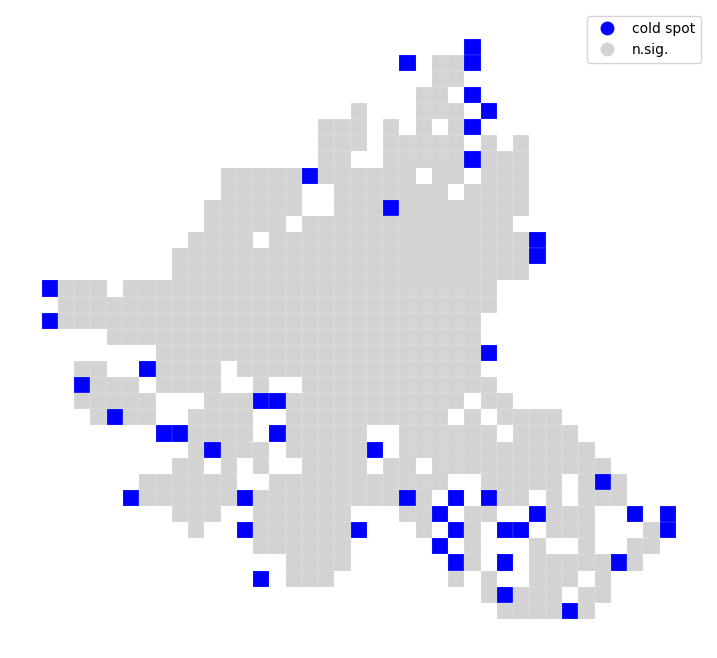

In [44]:
wk_am = wk_am
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
wk_am.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [45]:
spots = ['n.sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]

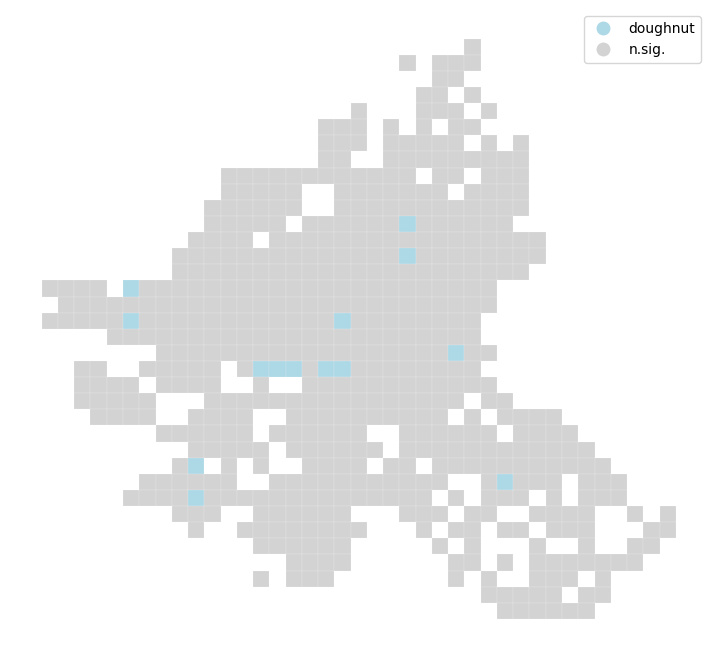

In [46]:
wk_am = wk_am
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
wk_am.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [47]:
spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]

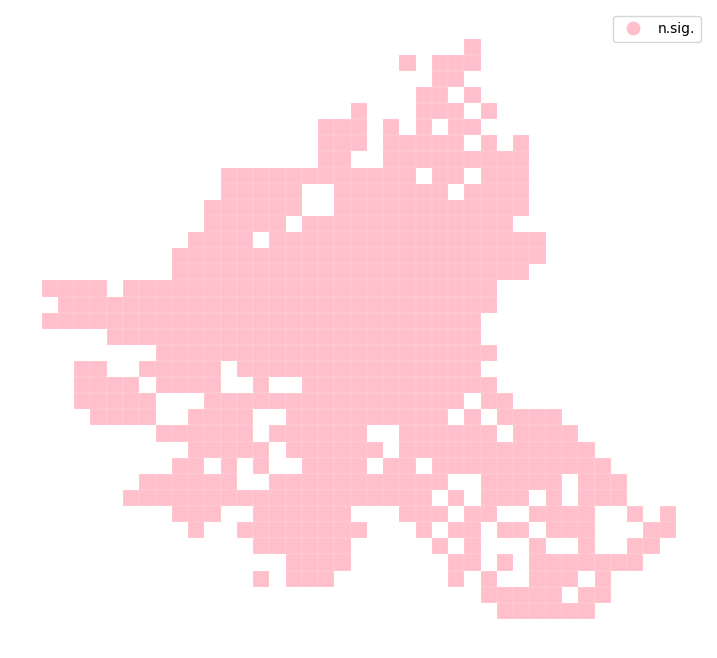

In [48]:
wk_am = wk_am
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
wk_am.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [49]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2,

In [50]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

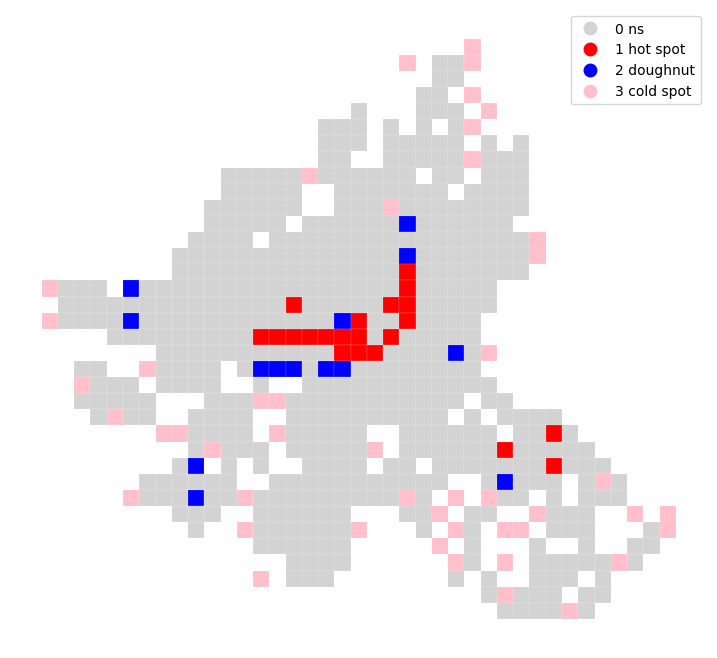

In [51]:
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
wk_am.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

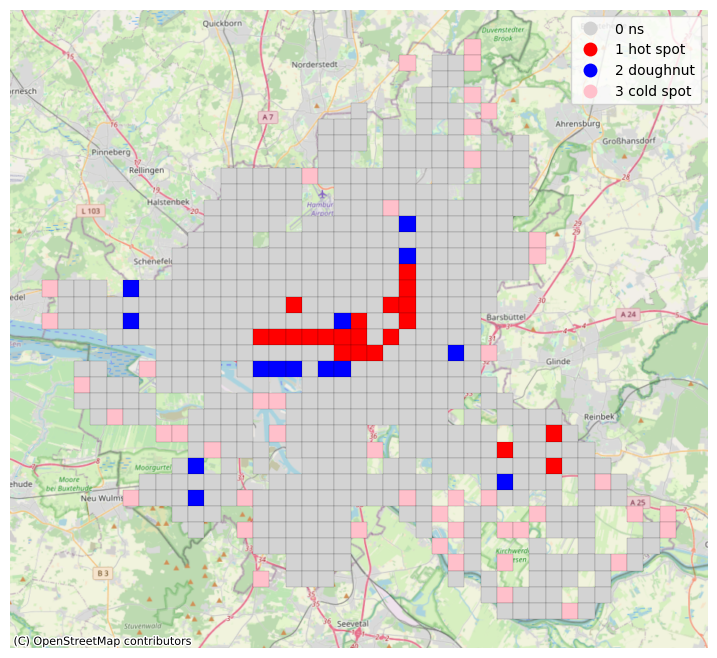

In [52]:
import contextily as ctx
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
wk_am.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='black', legend=True)
ctx.add_basemap(ax, crs=wk_am.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.show()